In [67]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

def k_means(X,theta):
    N, l = X.shape[:]
    m, l = theta.shape[:]
    e = 1
    iters = 0
    while(e > 10e-3):
        iters = iters + 1
        theta_old = theta.copy()
        dist_all = []
        for j in range(m):
            dist = np.sum((X - theta[j])**2, axis=1)
            dist_all.append(dist)
        bel = np.argmin(dist_all, axis=0)
        J = np.sum(np.min(dist_all, axis = 0))
        for j in range(m):
            if(np.sum(bel == j) != 0):
                theta[j] = np.sum(X*(np.tile(bel==j, (2, 1)).T), axis=0)/(1.0*np.sum(bel==j))
        e = np.sum(np.absolute(theta - theta_old))
    return theta, bel, J

def cost_comput(X, w):
    N, l = X.shape[:]
    m, l = w.shape[:]
    bel = np.zeros(N)
    cost = 0
    for i in range(N):
        t = np.zeros(m)
        for j in range(m):
            t[j] = np.sum((X[i] - w[j])**2)
        cost = cost + np.min(t)
        bel[i] = np.argmin(t)
    return bel, cost

def k_medoids(X,m):
    N, l = X.shape[:]
    a_init = np.random.permutation(N)
    a = a_init[:m]
    w_init = X[a]
    bel, cost = cost_comput(X, w_init)
    e = -1
    iters = 0
    while(e < 0):
        iters = iters + 1
        cost_old = cost
        for i in range(m):
            for j in range(N):
                a_temp = a.copy()
                if(np.sum(a_temp == j) == 0):
                    a_temp[i] = j
                    w_temp = X[a_temp]
                    bel_temp, cost_temp = cost_comput(X, w_temp)
                    if(cost_temp < cost):
                        bel = bel_temp
                        cost = cost_temp
                        a = a_temp
        e = cost - cost_old
    w = X[a]
    return bel, cost, w, a

def GMDAS(X,mv_ini,mc_ini,e,maxiter):
    mv = 1.0*mv_ini
    mc = 1.0*mc_ini
    N, l = X.shape[:]
    m, l = mv.shape[:]
    cp = np.ones((N, m))/m
    eps = (10e-6)*np.identity(l)
    
    iters = 0
    diff = e + 1
    mvold = mv
    mcold = mc
    apold = np.ones(m)/m
    diffvec = []
    while(iters < maxiter) and (diff > e):
        iters = iters + 1
        diffvec.append(diff)
        
        #prob
        auxvec = np.zeros((N, m))
        for j in range(N):
            dete=np.zeros(m)
            for i in range(m):
                dete[i] = np.linalg.det(mcold[i])
                d = np.reshape(X[j] - mvold[i], (1, l))
                dist = d @ np.linalg.inv(mcold[i] + eps) @ d.T
                auxvec[j, i] = ((((2*np.pi)**l)*dete[i])**(-.5))*np.exp(-.5*dist)*apold[i]
            sumaux = np.sum(auxvec, axis=1)
        loss = np.sum((sumaux))
        #c
        for j in range(N):
            for i in range(m):
                cp[j, i] = auxvec[j, i]/sumaux[j]
        
        temp = np.sum(cp, axis=0)
        ap = temp/N
        
        #mean
        for i in range(m):
            aux = np.zeros(l)
            for j in range(N):
                aux = aux + cp[j, i]*X[j]
            mv[i] = aux/temp[i]
        #cov
        for i in range(m):
            aux = np.zeros(l)
            for j in range(N):
                d = np.reshape(X[j] - mv[i], (1, l))
                aux = aux + cp[j, i]*(d.T @ d)
            mc[i] = aux/temp[i]
            
        diff = np.sum(np.abs(ap - apold)) + np.sum(np.abs(mv-mvold)) + np.sum(np.abs(mc-mcold))
       
        apold = ap
        mvold = mv
        mcold = mc
        
      
    return  ap, cp, mv, mc, iters, loss         
        

# Exercise 7.5.1

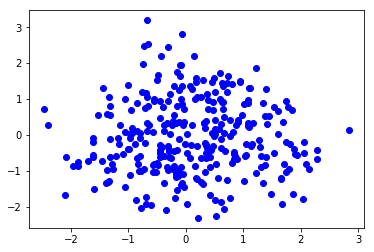

In [2]:
S1 = np.identity(2)
m1 = np.array([0, 0])

X = np.random.multivariate_normal(m1, S1, 300)
plt.plot(X[:, 0], X[:, 1], "bo")
plt.show()

[[0.25032102 0.33066941]
 [0.63158552 0.07247242]
 [0.15302934 0.21092453]]


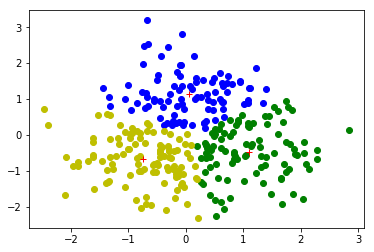

In [3]:
theta = np.random.rand(3, 2)
print(theta)
theta, bel, J = k_means(X, theta)

X1 = X[np.where(bel == 0)]
X2 = X[np.where(bel == 1)]
X3 = X[np.where(bel == 2)]
plt.plot(X1[:, 0], X1[:, 1], "bo")
plt.plot(X2[:, 0], X2[:, 1], "go")
plt.plot(X3[:, 0], X3[:, 1], "yo")
plt.plot(theta[:, 0], theta[:, 1], "k+")
plt.show()

[[0.52944185 0.50864195]
 [0.32580096 0.77521711]]


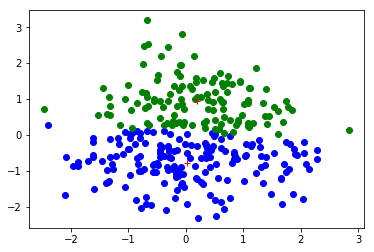

In [4]:
theta = np.random.rand(2, 2)
print(theta)
theta, bel, J = k_means(X, theta)
X1 = X[np.where(bel == 0)]
X2 = X[np.where(bel == 1)]
plt.plot(X1[:, 0], X1[:, 1], "bo")
plt.plot(X2[:, 0], X2[:, 1], "go")
plt.plot(theta[:, 0], theta[:, 1], "k+")
plt.show()

# Exercise 7.5.2

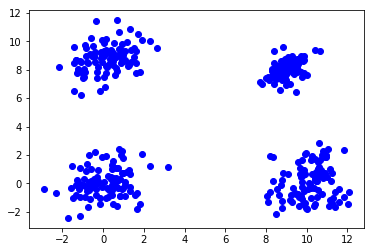

In [8]:
S1 = np.identity(2)
S2 = np.array([[1, 0.2], [0.2, 1.5]])
S3 = np.array([[1, 0.4], [0.4, 1.1]])
S4 = np.array([[0.3, 0.2], [0.2, 0.5]])
m1 = np.array([0, 0])
m2 = np.array([10, 0])
m3 = np.array([0, 9])
m4 = np.array([9, 8])
n = 100

x1 = np.random.multivariate_normal(m1, S1, n)
x2 = np.random.multivariate_normal(m2, S2, n)
x3 = np.random.multivariate_normal(m3, S3, n)
x4 = np.random.multivariate_normal(m4, S4, n)
X = np.concatenate([x1, x2, x3, x4])
plt.plot(X[:, 0], X[:, 1], "bo")
plt.show()

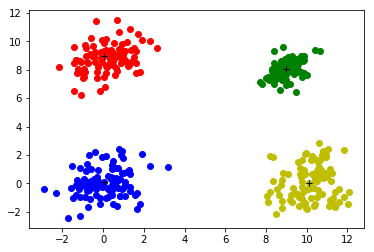

In [31]:
bel, cost, w, a = k_medoids(X, 4)
X1 = X[np.where(bel == 0)]
X2 = X[np.where(bel == 1)]
X3 = X[np.where(bel == 2)]
X4 = X[np.where(bel == 3)]
plt.plot(X1[:, 0], X1[:, 1], "bo")
plt.plot(X2[:, 0], X2[:, 1], "go")
plt.plot(X3[:, 0], X3[:, 1], "yo")
plt.plot(X4[:, 0], X4[:, 1], "ro")
plt.plot(w[:, 0], w[:, 1], "k+")
plt.show()

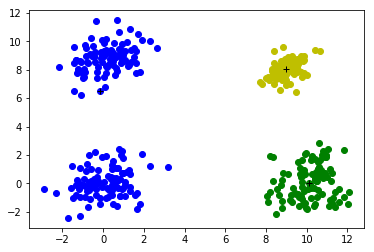

In [32]:
bel, cost, w, a = k_medoids(X, 3)
X1 = X[np.where(bel == 0)]
X2 = X[np.where(bel == 1)]
X3 = X[np.where(bel == 2)]
plt.plot(X1[:, 0], X1[:, 1], "bo")
plt.plot(X2[:, 0], X2[:, 1], "go")
plt.plot(X3[:, 0], X3[:, 1], "yo")
plt.plot(w[:, 0], w[:, 1], "k+")
plt.show()

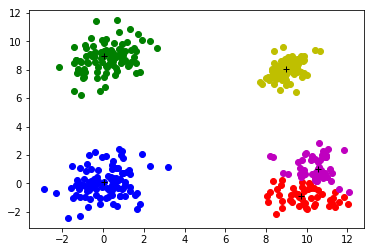

In [33]:
bel, cost, w, a = k_medoids(X, 5)
X1 = X[np.where(bel == 0)]
X2 = X[np.where(bel == 1)]
X3 = X[np.where(bel == 2)]
X4 = X[np.where(bel == 3)]
X5 = X[np.where(bel == 4)]
plt.plot(X1[:, 0], X1[:, 1], "bo")
plt.plot(X2[:, 0], X2[:, 1], "go")
plt.plot(X3[:, 0], X3[:, 1], "yo")
plt.plot(X4[:, 0], X4[:, 1], "ro")
plt.plot(X5[:, 0], X5[:, 1], "mo")
plt.plot(w[:, 0], w[:, 1], "k+")
plt.show()

# Exercise 7.5.3

In [ ]:
m_min = 2
m_max = 10
n_runs = 10
J_m = []
for m in range(m_min, m_max):
    J_temp_min = np.inf
    for t in range(n_runs):
        bel, cost, w, a = k_medoids(X, m)
        if(cost < J):
            J_temp_min = cost
    J_m.append(J_temp_min)
plt.plot(range(m_min, m_max), J_m)
plt.show()
    

# Exercise 7.5.4

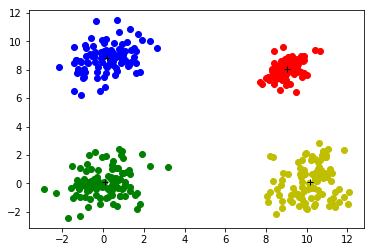

13.185600605936855


In [72]:
e = 10e-3
maxiter = 100
mv_ini = np.random.randint(0, 10, (4, 2))
mc_ini = np.array([S1, S2, S3, S4])
ap, cp, mv, mc, iters, loss = GMDAS(X,mv_ini,mc_ini,e,maxiter)

bel = np.argmax(cp, axis=1)
X1 = X[np.where(bel == 0)]
X2 = X[np.where(bel == 1)]
X3 = X[np.where(bel == 2)]
X4 = X[np.where(bel == 3)]
plt.plot(X1[:, 0], X1[:, 1], "bo")
plt.plot(X2[:, 0], X2[:, 1], "go")
plt.plot(X3[:, 0], X3[:, 1], "yo")
plt.plot(X4[:, 0], X4[:, 1], "ro")
plt.plot(mv[:, 0], mv[:, 1], "k+")
plt.show()
print(loss)

# Exercise 7.5.5

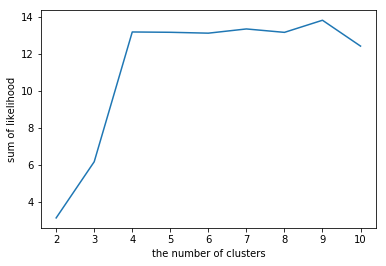

In [76]:
m_min = 2
m_max = 11
n_runs = 2
J_m = []
for m in range(m_min, m_max):
    J_temp_min = np.inf
    for t in range(n_runs):
        mv_ini = np.random.randint(0, 10, (m, 2))
        mc_ini = np.array([S1]*m)
        ap, cp, mv, mc, iters, loss = GMDAS(X,mv_ini,mc_ini,e,maxiter)
        if(loss < J_temp_min):
            J_temp_min = loss
    J_m.append(J_temp_min)
plt.plot(range(m_min, m_max), J_m)
plt.xlabel("the number of clusters")
plt.ylabel("sum of likelihood")
plt.show()